In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import timeit
import statistics
import time
import torch
import torch_geometric

from data_utils import synthetic_data

In [4]:
%timeit synthetic_data.make_a_group()

720 µs ± 14.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


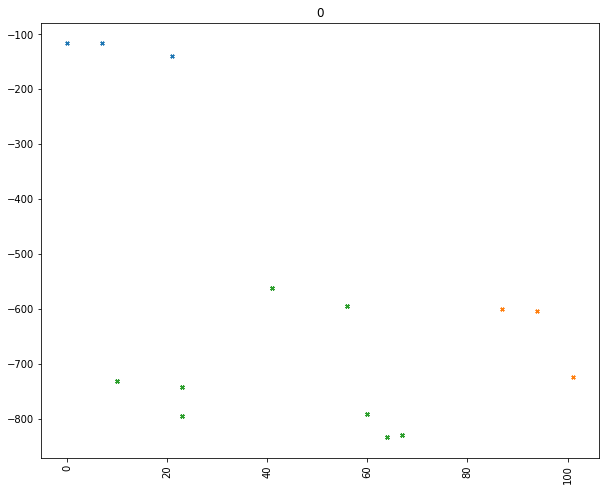

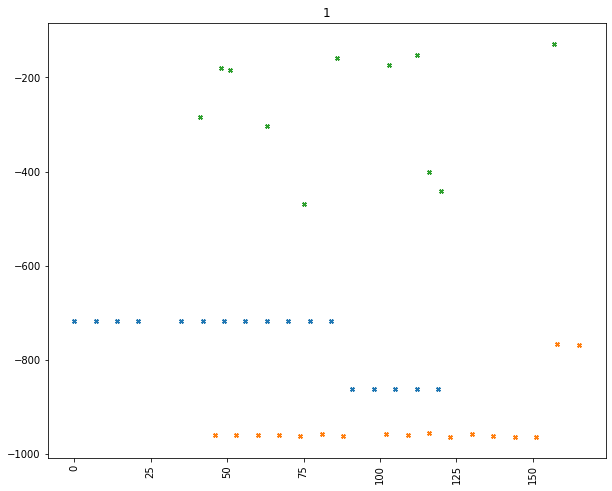

In [18]:
colour_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for i in range(2):
    d_lst, a_lst, g_lst = synthetic_data.make_a_group()
    
    d_arr = np.array(d_lst)
    a_arr = np.array(a_lst)
    g_arr = np.array(g_lst)    
    
    fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10,8), sharex=True)
    for g in g_lst:
        mask = (g_arr == g)
        
        ax1.scatter(d_arr[mask], a_arr[mask], s=10, c=colour_list[g%10], marker='x')
        ax1.set_title(str(i))
        #ax1.legend(loc="upper right")
    
    for ax1 in fig.axes:
        matplotlib.pyplot.sca(ax1)
        plt.xticks(rotation=90)
        #plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
    
    plt.show

In [ ]:
d_lst, a_lst, g_lst = synthetic_data.make_a_group()


### Set up the model

First construct the dataloader

In [19]:
from torch_geometric.data import Data

In [ ]:
Data(x=x, edge_index=edge_index, y=y)

In [ ]:
Data(x=None, edge_index=None, edge_attr=None, y=None, pos=None, norm=None, face=None)

In [5]:
import torch
from torch.nn import Sequential as Seq, Linear as Lin, ReLU
from torch_geometric.nn import MessagePassing

class EdgeConv(MessagePassing):
    def __init__(self, F_in, F_out):
        super(EdgeConv, self).__init__(aggr='max')  # "Max" aggregation.
        self.mlp = Seq(Lin(2 * F_in, F_out), ReLU(), Lin(F_out, F_out))

    def forward(self, x, edge_index):
        # x has shape [N, F_in]
        # edge_index has shape [2, E]
        return self.propagate(edge_index, x=x)  # shape [N, F_out]

    def message(self, x_i, x_j):
        # x_i has shape [E, F_in]
        # x_j has shape [E, F_in]
        edge_features = torch.cat([x_i, x_j - x_i], dim=1)  # shape [E, 2 * F_in]
        return self.mlp(edge_features)  # shape [E, F_out]

In [39]:
a = [3]
b = np.array([4,5])

from itertools import product

c = [x for x in product(a,b)] + [x for x in product(b,a)] 

In [40]:
d = []

e = d + c + c

In [44]:
set(e)

{(3, 4), (3, 5), (4, 3), (5, 3)}

In [45]:
a = np.array([3])
b = np.array([4,5])

In [47]:
np.concatenate((a,b))

array([3, 4, 5])